N = 1
starting points of all drones  [(19.0, -4.0)]


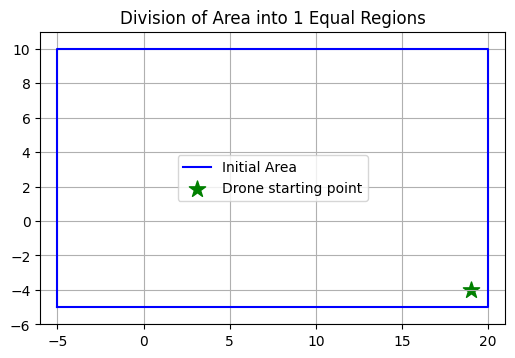


N =  2
starting points of all drones  [(19.0, -4.0), (19.0, 3.5)]


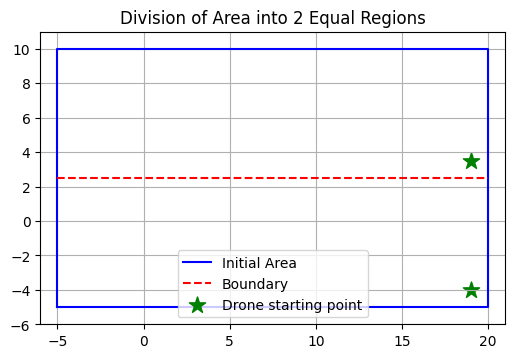

drone 0 with geofencing [(-5, -5), (20, -5), (-5, 2.5), (20, 2.5)]
drone 1 with geofencing [(-5, 2.5), (20, 2.5), (-5, 10), (20, 10)]
traverse drone 0
check if flag found in camera for drone 0
traverse drone 1
check if flag found in camera for drone 1

N =  3
starting points of all drones  [(2.333333333333334, -4.0), (10.666666666666668, -4.0), (19.0, -4.0)]


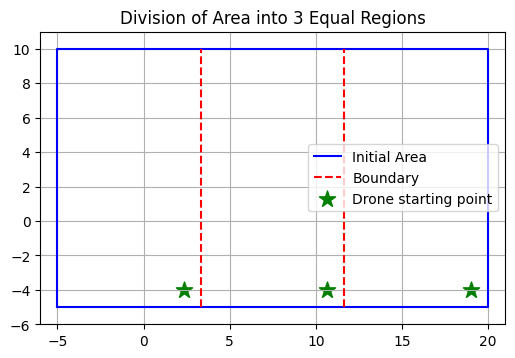

drone 0 with geofencing [(-5, -5), (3.333333333333334, 10), (-5, 10), (3.333333333333334, -5)]
drone 1 with geofencing [(11.666666666666668, 10), (3.333333333333334, 10), (11.666666666666668, -5), (3.333333333333334, -5)]
drone 2 with geofencing [(11.666666666666668, 10), (20, -5), (11.666666666666668, -5), (20, 10)]
traverse drone 0
check if flag found in camera for drone 0
traverse drone 1
check if flag found in camera for drone 1
traverse drone 2
check if flag found in camera for drone 2

N =  4
starting points of all drones  [(6.5, -4.0), (6.5, 3.5), (19.0, -4.0), (19.0, 3.5)]


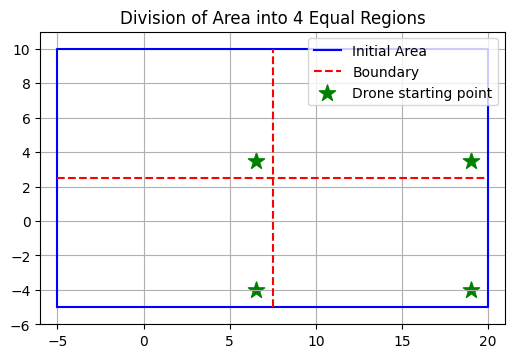

drone 0 with geofencing [(7.5, 2.5), (-5, -5), (-5, 2.5), (7.5, -5)]
drone 1 with geofencing [(7.5, 2.5), (7.5, 10), (-5, 2.5), (-5, 10)]
drone 2 with geofencing [(7.5, 2.5), (20, -5), (20, 2.5), (7.5, -5)]
drone 3 with geofencing [(7.5, 2.5), (7.5, 10), (20, 2.5), (20, 10)]
traverse drone 0
check if flag found in camera for drone 0
traverse drone 1
check if flag found in camera for drone 1
traverse drone 2
check if flag found in camera for drone 2
traverse drone 3
check if flag found in camera for drone 3

N =  5
starting points of all drones  [(-1.0, -4.0), (4.0, -4.0), (9.0, -4.0), (14.0, -4.0), (19.0, -4.0)]


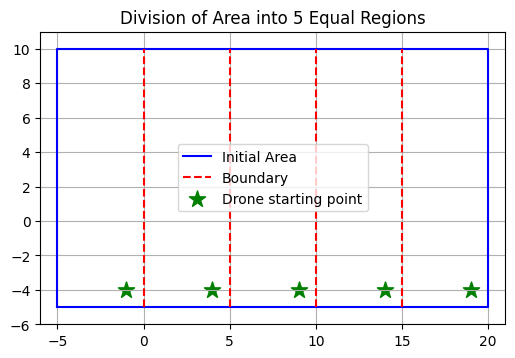

drone 0 with geofencing [(0.0, -5), (-5, -5), (0.0, 10), (-5, 10)]
drone 1 with geofencing [(0.0, -5), (5.0, 10), (0.0, 10), (5.0, -5)]
drone 2 with geofencing [(10.0, 10), (5.0, 10), (10.0, -5), (5.0, -5)]
drone 3 with geofencing [(15.0, 10), (10.0, 10), (15.0, -5), (10.0, -5)]
drone 4 with geofencing [(15.0, 10), (20, -5), (15.0, -5), (20, 10)]
traverse drone 0
check if flag found in camera for drone 0
traverse drone 1
check if flag found in camera for drone 1
traverse drone 2
check if flag found in camera for drone 2
traverse drone 3
check if flag found in camera for drone 3
traverse drone 4
check if flag found in camera for drone 4

N =  6
starting points of all drones  [(2.333333333333334, -4.0), (2.333333333333334, 3.5), (10.666666666666668, -4.0), (10.666666666666668, 3.5), (19.0, -4.0), (19.0, 3.5)]


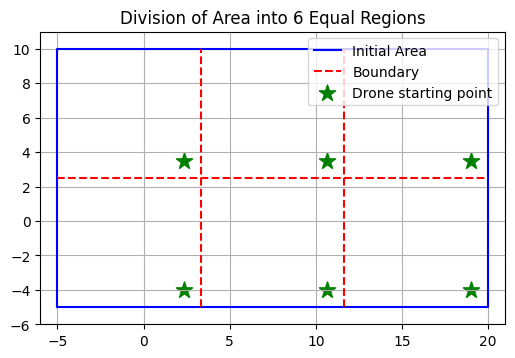

drone 0 with geofencing [(3.333333333333334, 2.5), (-5, -5), (-5, 2.5), (3.333333333333334, -5)]
drone 1 with geofencing [(3.333333333333334, 2.5), (3.333333333333334, 10), (-5, 2.5), (-5, 10)]
drone 2 with geofencing [(3.333333333333334, -5), (11.666666666666668, -5), (11.666666666666668, 2.5), (3.333333333333334, 2.5)]
drone 3 with geofencing [(3.333333333333334, 2.5), (11.666666666666668, 10), (3.333333333333334, 10), (11.666666666666668, 2.5)]
drone 4 with geofencing [(20, -5), (20, 2.5), (11.666666666666668, 2.5), (11.666666666666668, -5)]
drone 5 with geofencing [(11.666666666666668, 10), (20, 2.5), (11.666666666666668, 2.5), (20, 10)]
traverse drone 0
check if flag found in camera for drone 0
traverse drone 1
check if flag found in camera for drone 1
traverse drone 2
check if flag found in camera for drone 2
traverse drone 3
check if flag found in camera for drone 3
traverse drone 4
check if flag found in camera for drone 4
traverse drone 5
check if flag found in camera for dron

In [ ]:
import math
import matplotlib.pyplot as plt

def find_enclosing_rectangle(boundary_points, target_point):

    """
        Given drone location & all boundary edges/points after dividing original area into diff regions
        Returns 4 correct boundary points as long as the drone is not located on one of the boundaries,
        If drone is on the boundary, then it just returns 2 points (the start & end points of the same boundary)
    """

    x, y = target_point

    # Initialize min and max values
    min_x = float('inf')
    max_x = float('-inf')
    min_y = float('inf')
    max_y = float('-inf')

    # Find the closest boundary points in each direction
    for point in boundary_points:
        px, py = point

        if px <= x and px > max_x:
            max_x = px
        if px >= x and px < min_x:
            min_x = px

        if py <= y and py > max_y:
            max_y = py
        if py >= y and py < min_y:
            min_y = py

    # Return the four corner points of the enclosing rectangle
    return list(set([
        (min_x, min_y),
        (min_x, max_y),
        (max_x, max_y),
        (max_x, min_y)
    ]))

def divide_into_starting_points(boundary_points):
    """
        Given the number of regions divided & all boundary points after dividing original area into diff regions
        Returns starting points of all the drones, after moving them a little ahead of BOTTOM RIGHT of their respective region
    """
    rectangles = []
    # Extract unique x coordinates and y coordinates
    x_coords = set(point[0] for point in boundary_points)
    y_coords = set(point[1] for point in boundary_points)

    # Convert sets to sorted lists (optional)
    x_coords = sorted(x_coords)
    y_coords = sorted(y_coords)

    # Print the sorted x and y coordinates
    # print("Sorted x coordinates:", x_coords)
    # print("Sorted y coordinates:", y_coords)

    if y_coords:
        y_coords.pop()  # Removes the last element from y_coords
    if x_coords:
        x_coords.pop(0)  # Removes the first element from x_coords

    # print("Updated X coordinates:", x_coords)
    # print("Updated Y coordinates:", y_coords)

    THRESHOLD = 1.0 # initial distance from the boundary
    points = [(x, y) for x in x_coords for y in y_coords]
    for i,point in enumerate(points):
      px,py = point
      points[i] = (px - THRESHOLD, py + THRESHOLD)

    return points


def getboundary(division_lines,n):
  """
        Returns boundary points of the entire area, starting from initial 4 points of the rectangle
  """

  boundary_points = [(Minx,Miny), (Maxx,Maxy),(Minx,Maxy),(Maxx,Miny)]

  if n == 1:
    return boundary_points

  for i, line in enumerate(division_lines):
      p1, p2 = line
      boundary_points.append(p1)
      boundary_points.append(p2)

  return boundary_points


def plottify(starting_points,division_lines,boundary_points,n):

  print("starting points of all drones ",starting_points)
  # print("boundary points",boundary_points)
  # boundary = find_enclosing_rectangle(boundary_points, drone_location)
  # print("geofencing boundary of the drone ",boundary)

  # Plotting the initial area and division lines
  plt.figure(figsize=(6, 6))

  # Plot the initial rectangular area
  plt.plot([Minx, Maxx, Maxx, Minx, Minx], [Miny, Miny, Maxy, Maxy, Miny], 'b-', label='Initial Area')

  # Plot the division lines
  for i, line in enumerate(division_lines):
      (x_start, y_start), (x_end, y_end) = line
      plt.plot([x_start, x_end], [y_start, y_end], 'r--', label=f'Boundary' if i == 0 else "")

  for j,point in enumerate(starting_points):
    px, py = point
    if j == 0:      # Add label only for the first point
        plt.scatter(px, py, color='green', marker='*', s=150, label='Drone starting point')
    else:            # Skip label for subsequent points
        plt.scatter(px, py, color='green', marker='*', s=150)

  # Format & Show the plot
  plt.xlim(Minx - 1, Maxx + 1)
  plt.ylim(Miny - 1, Maxy + 1)
  plt.gca().set_aspect('equal', adjustable='box')
  plt.title(f"Division of Area into {n} Equal Regions")
  plt.legend()
  plt.grid(True)
  plt.show()

def traverse(starting_points, boundary_points):

  geofence = []
  n = len(starting_points)
  for i,pt in enumerate(starting_points):
    bdry = find_enclosing_rectangle(boundary_points, pt)
    geofence.append(bdry)
    print("drone",i, "with geofencing", bdry)
  for i in range(n):
    print("traverse drone", i)
    print ("check if flag found in camera for drone",i)




if __name__ == "__main__":

  # Initial area bounds - works for rectangles/squares - currently hardcoded, will later fetch it from map
  Minx = -5
  Miny = -5
  Maxx = 20
  Maxy = 10

  for i in range(1,7):

    N = i    # Number of regions/drones (works for any positive int N )

    rows = cols = 0
    if N == 1:     # Edge case: N = 1, no division needed
        print(f"N = 1")
        boundary_points = getboundary([],N)
        starting_points = divide_into_starting_points(boundary_points)
        plottify(starting_points,[],boundary_points,N)
        continue
    elif N % 2 == 0:
        rows = 2
        cols = N // 2
    else:
        rows = 0
        cols = N

    print("\nN = ", N)

    # Calculate the starting and ending points of vertical/horizontal lines that will divide the region equally
    division_lines = []

    if rows == 2:                   # Compute horizontal line for the rows
        row_height = (Maxy - Miny) / rows
        y_line = Miny + row_height
        division_lines.append(((Minx, y_line), (Maxx, y_line)))  # Horizontal line

    col_width = (Maxx - Minx) / cols
    for i in range(1, cols):          # Compute vertical lines for the columns
        x_line = Minx + i * col_width
        division_lines.append(((x_line, Miny), (x_line, Maxy)))  # Vertical lines

    boundary_points = getboundary(division_lines,N)
    starting_points = divide_into_starting_points(boundary_points)
    plottify(starting_points,division_lines,boundary_points,N)
    traverse(starting_points, boundary_points)


    """
        Since we have initialised the drones to the BOTTOM RIGHT of their boundaries,
        We can now write a basic traversal algorithm that moves the drone
        upwards till its boundary, turn left , then downwards till its boundary, turn right,
        AND REPEAT until it reaches the BOTTOM LEFT of its boundary or it finds the flag first.
        This will ensure geofencing of the drone as well as it will keep searching for the flag
    """